<a href="https://colab.research.google.com/github/SaraKarim23/PART_4-RHESSI-Mission-Data-to-Identify-Solar-Flare/blob/main/PART_4_RHESSI_Mission_Data_to_Identify_Solar_Flare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
%matplotlib inline

# To ensure python2 and python3 compatability
from __future__ import division, print_function

# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Setting plot display parameters
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 9)
sns.set_style('darkgrid')

# Suppress warnings display
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv('/content/drive/MyDrive/MSc/Solar /hessi.solar.flare.2002to2016.csv',sep=",")
df.head(3)

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN


In [42]:
df.isnull().sum()


flare                   0
start.date              0
start.time              0
peak                    0
end                     0
duration.s              0
peak.c/s                0
total.counts            0
energy.kev              0
x.pos.asec              0
y.pos.asec              0
radial                  0
active.region.ar        0
flag.1                  0
flag.2                  0
flag.3              19907
flag.4              20202
flag.5              60951
dtype: int64

In [44]:
new_df = pd.read_csv('/content/drive/MyDrive/MSc/Solar /hessi.solar.flare.2002to2016.csv',sep=",", index_col=0)

# process date / time columns
def parse_date(sdatex,stimex):
    datex = datetime.strptime(sdatex, '%Y-%m-%d')
    timex = datetime.strptime(stimex, '%H:%M:%S')
    return datetime(datex.year,datex.month,datex.day,timex.hour,timex.minute,timex.second)

# Adding year, month, day, start date, peak date, end date and dropping earlier columns
new_df['dt.start'] = new_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.peak'] = new_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
new_df['dt.end'] = new_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)

# clean columns
new_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)

# add new columns
new_df['year'] = new_df['dt.start'].apply(lambda col: col.year)
new_df['month'] = new_df['dt.start'].apply(lambda col: col.month)
new_df['day'] = new_df['dt.start'].apply(lambda col: col.day)

In [45]:
new_df.columns

Index(['duration.s', 'peak.c/s', 'total.counts', 'energy.kev', 'x.pos.asec',
       'y.pos.asec', 'radial', 'active.region.ar', 'flag.1', 'flag.2',
       'flag.3', 'flag.4', 'flag.5', 'dt.start', 'dt.peak', 'dt.end', 'year',
       'month', 'day'],
      dtype='object')

In [46]:
new_df = new_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'_flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})

In [47]:
new_df.head(3)

,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,flag_2,flag_3,flag_4,_flag_5,date_start,date_peak,date_end,year,month,day
flare,,,,,,,,,,,,,,,,,,,
2021213,712,136,167304,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
2021228,288,7,9504,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2021332,216,15,11448,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [48]:
DATA_by_yr = new_df.groupby(['year'])['total_counts'].sum()
DATA_by_month = new_df.groupby(['month'])['total_counts'].sum().sort_values(ascending=False)
DATA_vs_energy = new_df.groupby(['energy_kev'])['energy_kev'].count().sort_values(ascending=True)

In [49]:
'''Selecting 1000 rows and 4 coulmns from new dataframe for plots
    and finding value distribution and relation'''
data_part = new_df.iloc[1:1000, 0:4]

In [50]:
data_part.columns

Index(['duration_s', 'peak_c_s', 'total_counts', 'energy_kev'], dtype='object')


# **Relation between Flare duration, Peak count rate and Total count with respect to Energy**

Majority of the flares are of the energy range 6-12 KeV. Another small majority of flares are of range 12-25 KeV. Flares having energies greater than range 25-50 KeV are very sparse and rare in occurrence.


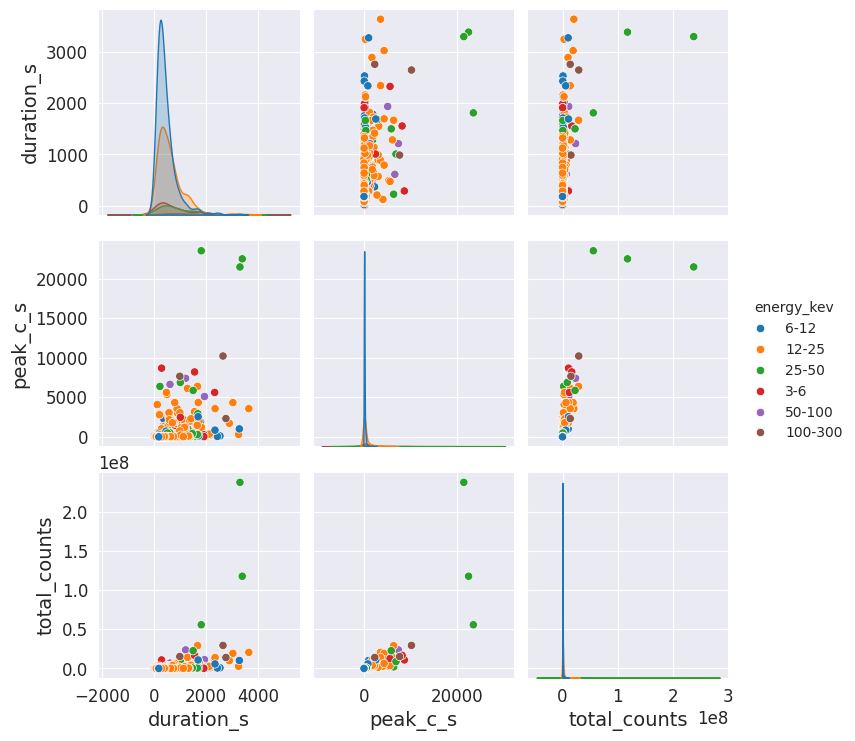

In [51]:
sns.pairplot(data=data_part, hue='energy_kev', vars=['duration_s', 'peak_c_s', 'total_counts'])

# **Density plot to visualize the distribution of the Flare wrt. Energy**

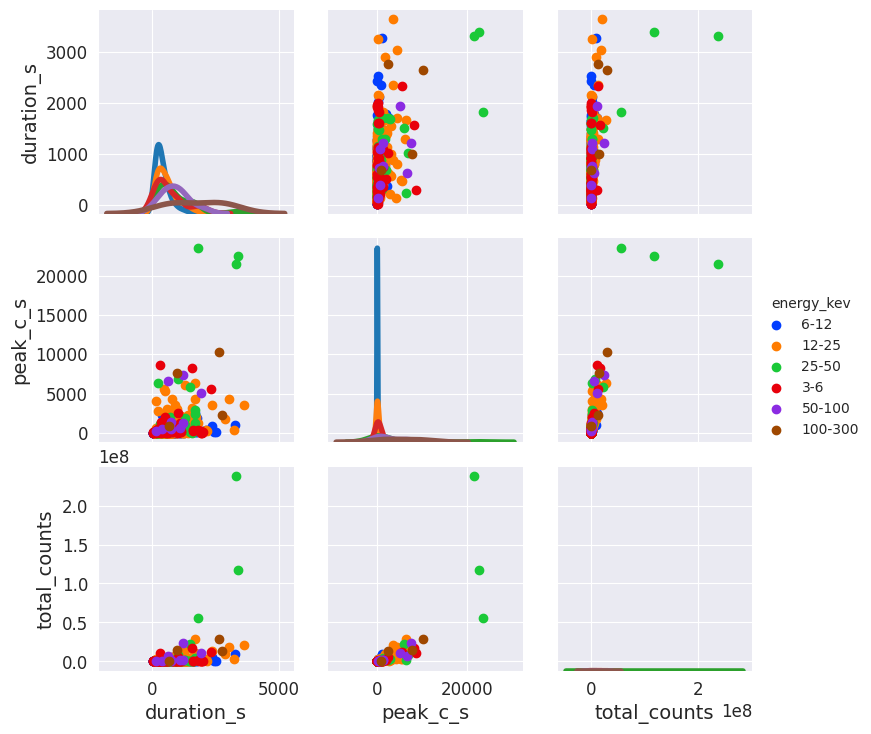

In [53]:
g =  sns.PairGrid(data_part, hue='energy_kev', palette='bright')

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs, linewidth=4)

g.map_diag(f)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()



# **Countplot to Visualize distribution of flares in the different energy ranges**

The countplot visualizes the distribution of flares from the data_part dataframe(having 1000 rows of the entire dataset). We see that the 6-12 KeV energy range dominates all the other value range. We assume the same trend continues for the entire dataset.


Text(0, 0.5, 'Energy Density Range (KeV)')

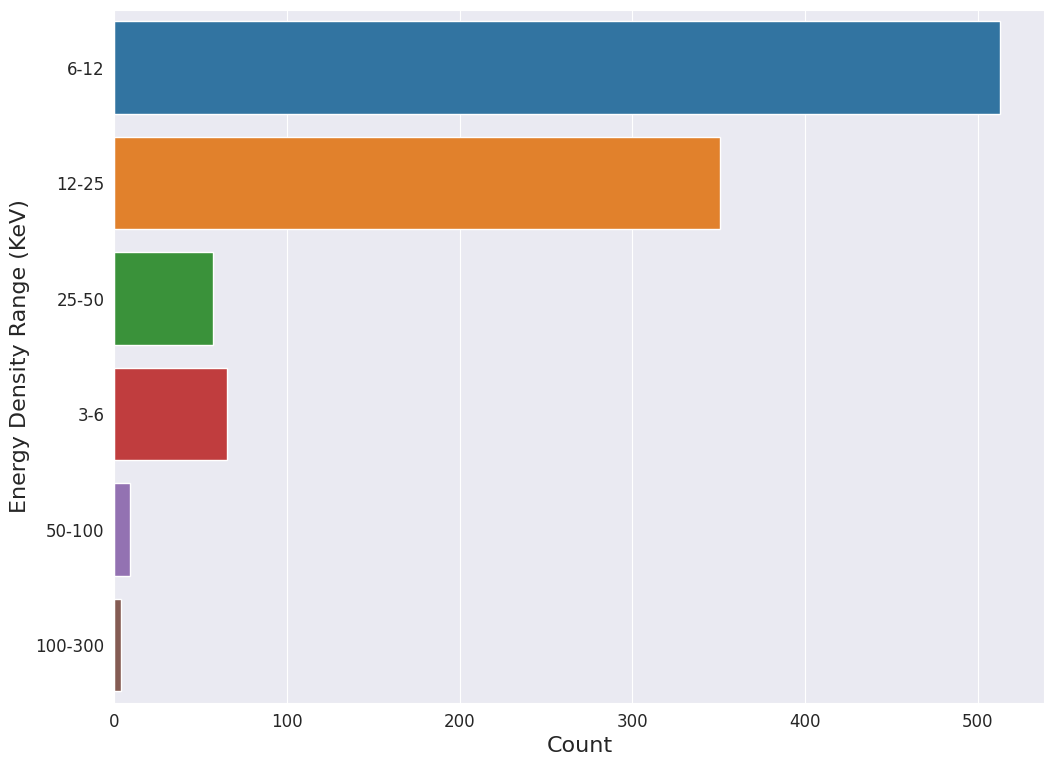

In [54]:
sns.countplot(y='energy_kev', data=data_part, hue='energy_kev')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Energy Density Range (KeV)', fontsize=16)

**Countplot on the entire dataset to verify assumption**

Text(0, 0.5, 'Energy Density Range (KeV)')

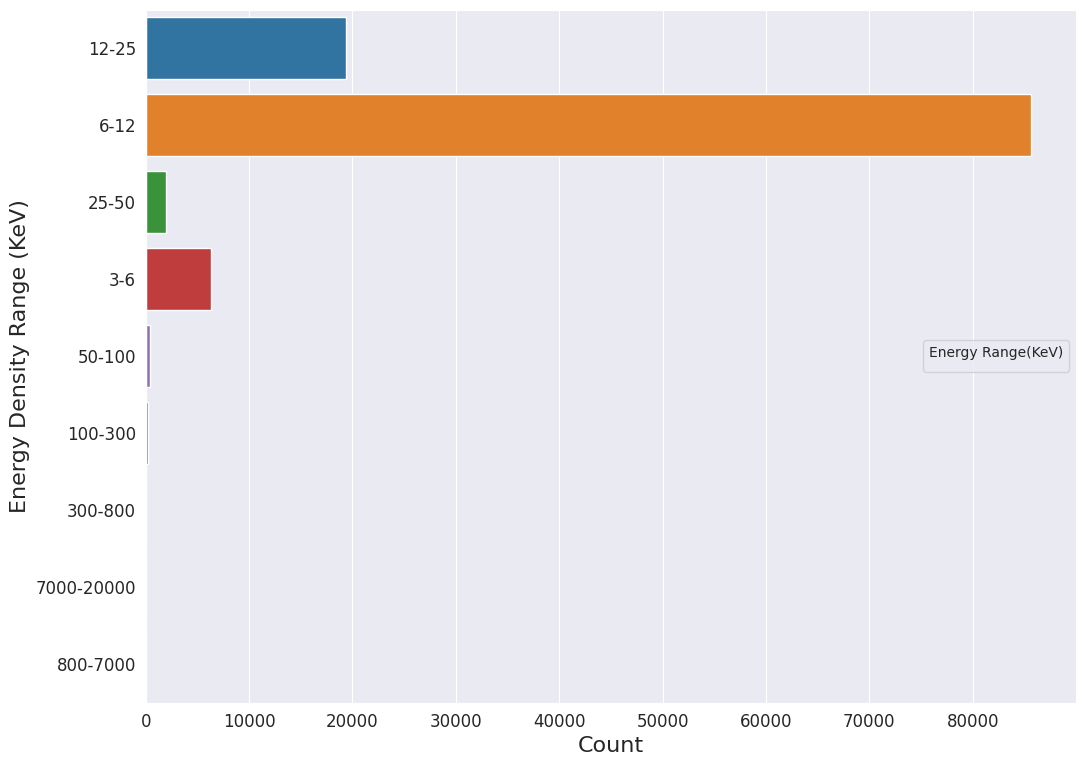

In [55]:
sns.countplot(y='energy_kev', data=new_df, hue='energy_kev')
plt.legend(title='Energy Range(KeV)', loc='right', prop={'size': 10})
plt.xlabel('Count', fontsize=16)
plt.ylabel('Energy Density Range (KeV)', fontsize=16)

We hence confirm our assumption by plotting a countplot on the entire dataset. A majority of flares appear in the energy range of 6-12 KeV, followed by the 12-25 KeV range.


# **Relation between Energy density and Duration(in seconds)**

The plot uses only thousand rows(data_part dataframe). We infer that short duration pulses are having high energy density.


Text(0, 0.5, 'Energy Density')

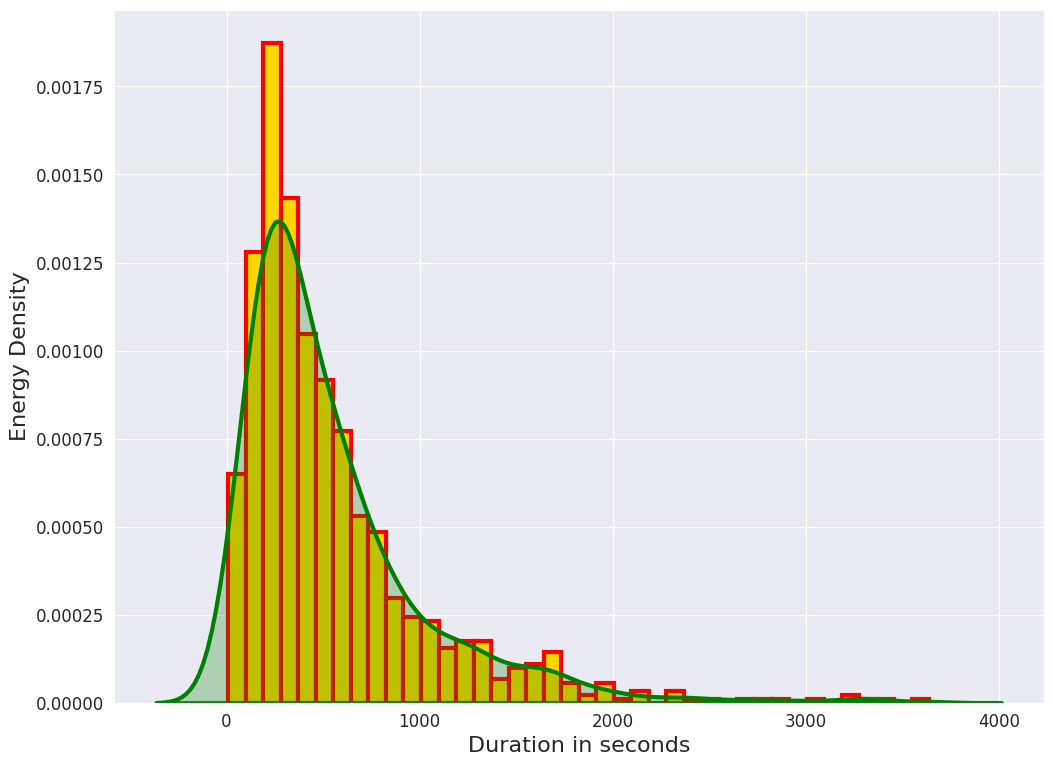

In [56]:
sns.distplot(data_part['duration_s'], kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold', edgecolor='red', lw=3))
plt.xlabel('Duration in seconds', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

### **Histogram and Density Curve of Flare Duration**

Text(0, 0.5, 'Energy Density')

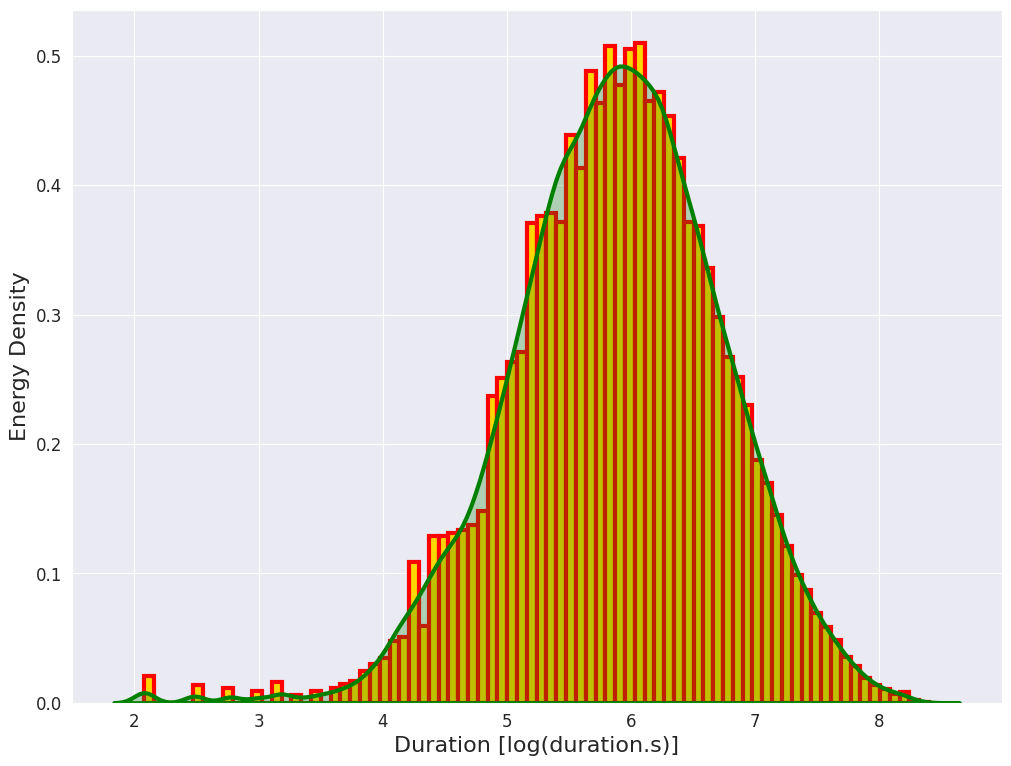

In [57]:
df['duration_s_log'] = np.log(df['duration.s'])
sns.distplot(df['duration_s_log'], bins=80, kde_kws=dict(color='green', lw=3, shade=True),
             hist_kws=dict(alpha=1, color= 'gold',edgecolor='red', lw=3))
plt.xlabel('Duration [log(duration.s)]', fontsize=16)
plt.ylabel('Energy Density', fontsize=16)

### **Relation between Radial values and the total count of flares**

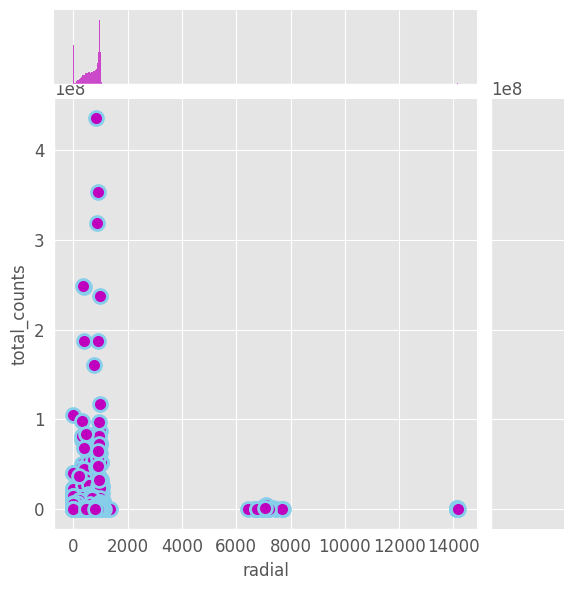

In [58]:
plt.style.use('ggplot')
sns.jointplot(x=new_df['radial'], y=new_df['total_counts'], color='m', kind='scatter', s=100, edgecolor="skyblue", linewidth=2)

**Relation between Duration and log(count of flare)**

Text(0.5, 0, 'Energy (KeV)')

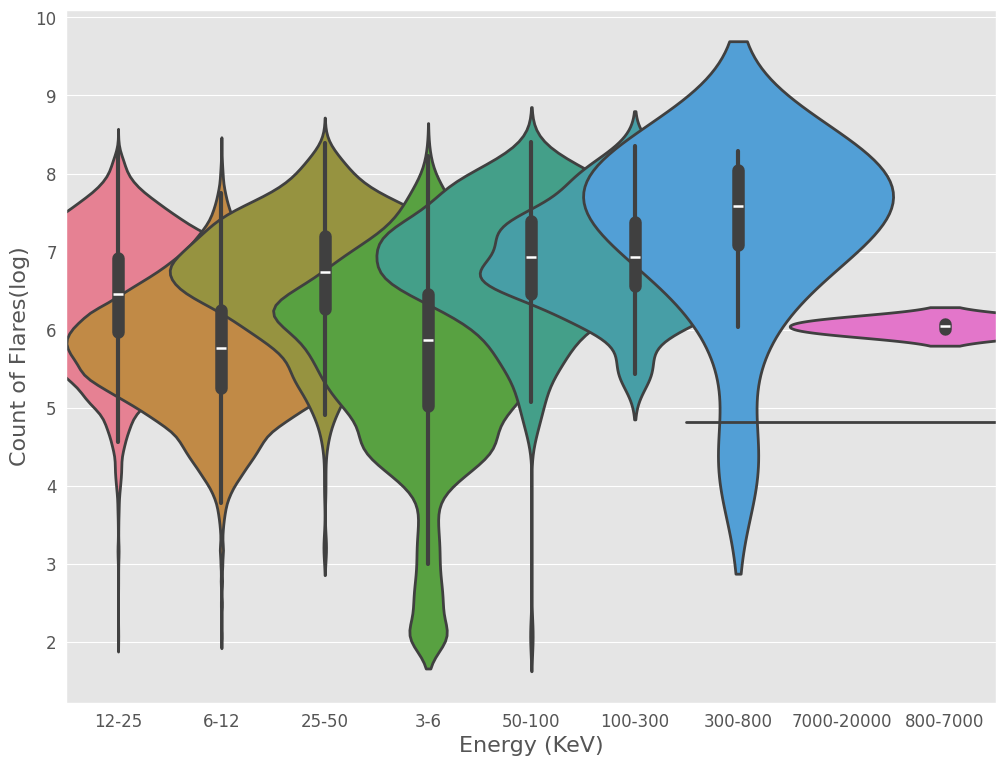

In [59]:
df['flare_log'] = np.log(df['duration.s'])
sns.violinplot(x=df['energy.kev'], y=df['flare_log'], width=3, linewidth=2, hue=df['energy.kev'])
plt.ylabel('Count of Flares(log)', fontsize=16)
plt.xlabel('Energy (KeV)', fontsize=16)

### **Distribution of flares over time duration (in seconds) wrt. Energies**

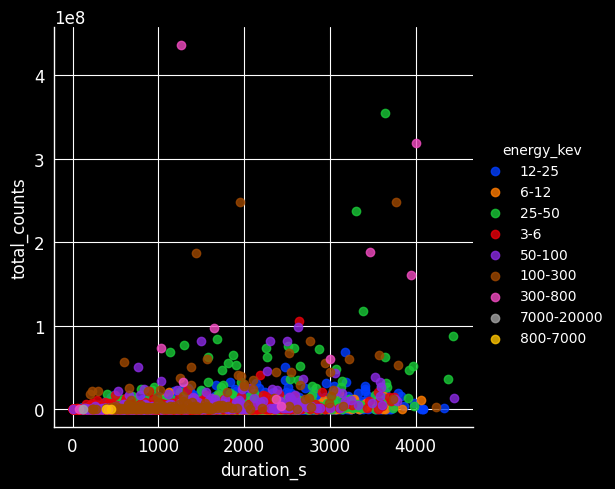

In [60]:
plt.style.use('dark_background')
sns.lmplot(x='duration_s', y='total_counts', hue='energy_kev', fit_reg=False, legend=True, data=new_df, palette='bright')

## Solar Flares trend over the Years (2002-2016)

Text(0, 0.5, 'Solar Flare per Year')

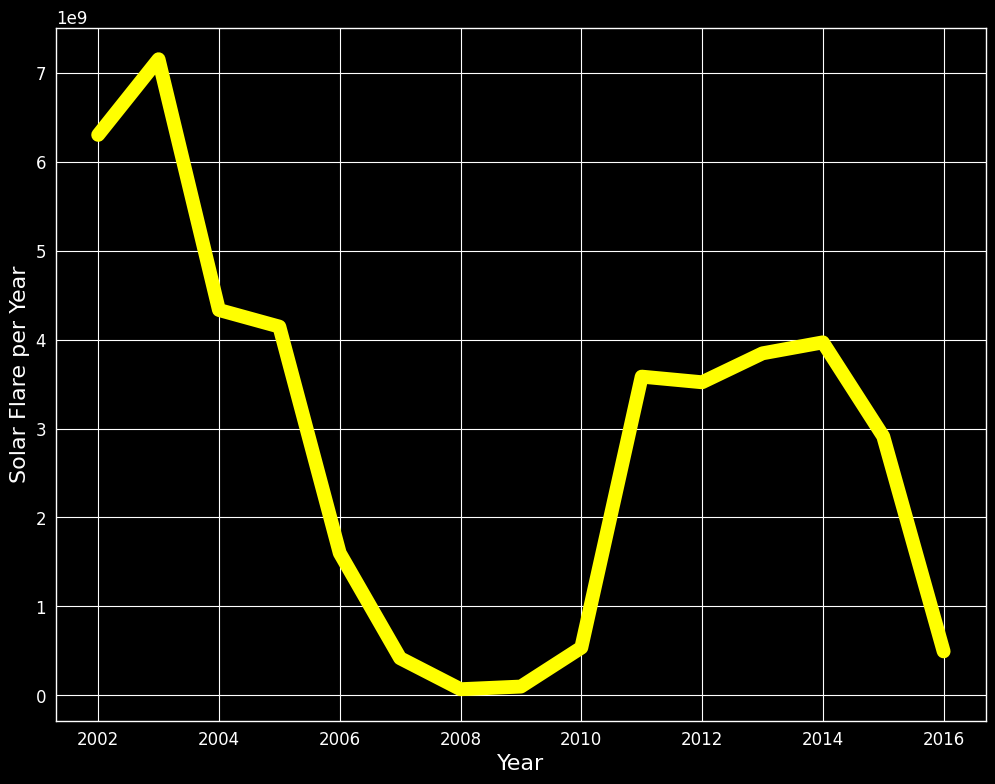

In [61]:
plt.style.use('dark_background')
plt.plot(DATA_by_yr, 'yellow', linewidth=10)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Solar Flare per Year', fontsize=16)


# **Sunspots - Mapping Flares on the Sun**
Filtering data - removing flares having attributes null or NaN values

In [63]:
'''Filtering data based on the energy range 3-6 KeV, flags and radial values. Filtering possible values
    which may be wrong or without any solar event '''

def filter_data(DATA,lwrong):
    ## filter 1: 3-6 kev
    lenght1 = len(DATA)
    DATA = DATA[DATA['energy.kev']!='3-6']
    lenght2 = len(DATA)
    if lenght1!=lenght2:
        print('filtering 3-6 kev energy range',lenght1,lenght2)

    ## filter 2: radial
    radial = DATA['radial'].values
    lenght1 = len(DATA)
    DATA = DATA[DATA['radial']<=np.percentile(radial,99)]
    lenght2 = len(DATA)
    if lenght1!=lenght2:
        print('filtering radial',lenght1,lenght2)

    # filter possible wrong values or without solar event
    #lwrong = ['NS','SD','SS','DF','DR','ED','ES','FE','FR','FS','GD','GE','GS','MR','P0','PS','PE']
    for icod in lwrong:
        ## filter
        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.1']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.2']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.3']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        DATA = DATA[DATA['flag.4']!=icod]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

        lenght1 = len(DATA)
        values = DATA['flag.5'].values
        lfilter = [i for i in list(values[pd.notnull(values)]) if icod in i]
        DATA = DATA[~DATA['flag.5'].isin(lfilter)]
        lenght2 = len(DATA)
        if lenght1!=lenght2:
            print('filtering %s'%icod,lenght1,lenght2)

    return DATA

In [65]:
""" Reading dataset and filtering values based on above parameters of the function"""
data = pd.read_csv('/content/drive/MyDrive/MSc/Solar /hessi.solar.flare.2002to2016.csv', sep=',')
# filtering basic
lwrong = ['NS','SD']
filtered_data = filter_data(data,lwrong)

# include energy bounday ranges
filtered_data['energy.kev.i'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[0]))
filtered_data['energy.kev.f'] = filtered_data['energy.kev'].apply(lambda col: int(col.split('-')[1]))

CENERGY = filtered_data[['energy.kev','energy.kev.i','energy.kev.f']].drop_duplicates(inplace=False).sort_values(['energy.kev.i'], ascending=[1], inplace=False)

filtering 3-6 kev energy range 113942 107606
filtering radial 107606 106537
filtering SD 106537 106501
filtering SD 106501 106408


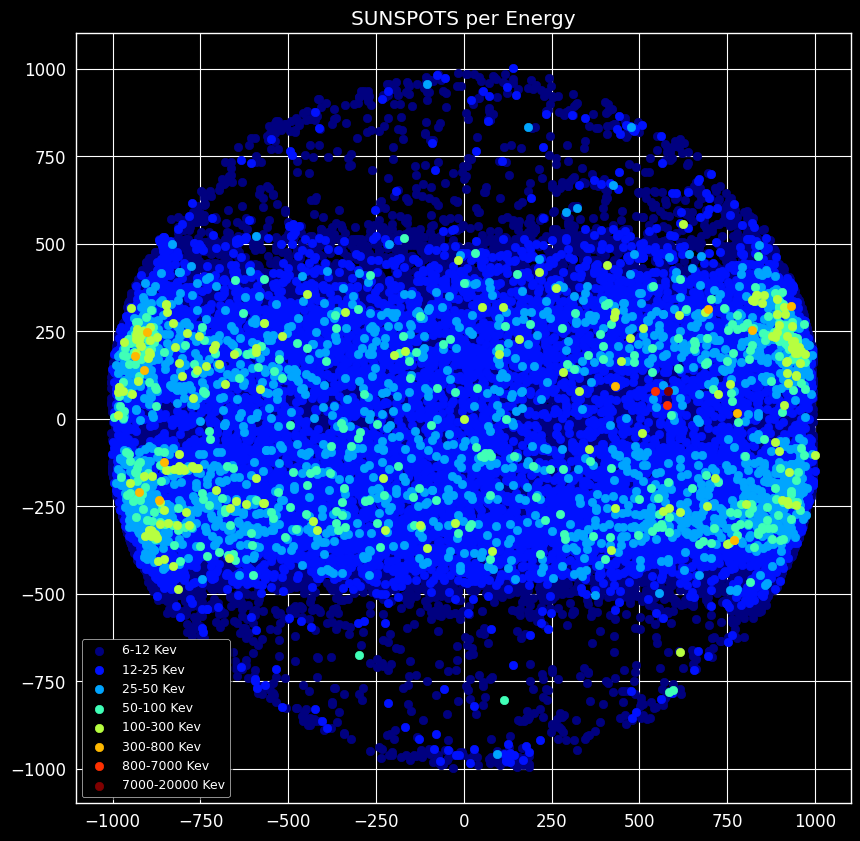

In [66]:
'''Plotting all the Flares from the filtered dataframe'''

colors = plt.cm.jet(np.linspace(0,1,len(CENERGY['energy.kev.i'].values)))

# build figure object
fig, ax = plt.subplots(figsize=(10,10))
# loop over energy ranges
for i,irange in enumerate(CENERGY['energy.kev'].values):
    # collect filtered data in temporary dataset
    AUX_data = filtered_data[filtered_data['energy.kev']==irange][['x.pos.asec','y.pos.asec']]
    # scatter plot to plot flare
    plt.scatter(AUX_data['x.pos.asec'].values,AUX_data['y.pos.asec'].values,color=colors[i],label='%s Kev'%irange)
    ax.legend(loc='best',fontsize=9,shadow=True)
    # delete auxillary/temporary dataset
    del(AUX_data)
# set title to plot
plt.title('SUNSPOTS per Energy')
# plot
plt.show()

### **Flare position in the Sun arcsec from the center**

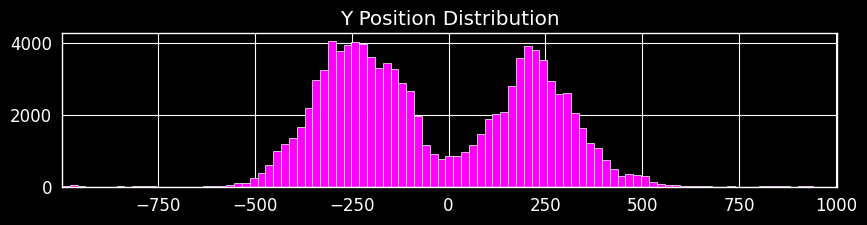

In [69]:
'''Y position distriution arounf the center of the sun'''
fig, ax = plt.subplots(figsize=(10,2))
# hist
y = filtered_data['y.pos.asec'].values
plt.hist(y, bins=np.linspace(np.min(y),np.max(y),100), label="label var y", color='magenta')
# set limits
ax.set_xlim([np.min(y),np.max(y)])
# title
plt.title('Y Position Distribution')
# plot
plt.show()


# **Yearly analysis of Flares**


<Axes: title={'center': 'YEARLY NUMBER OF EVENTS'}, xlabel='year'>

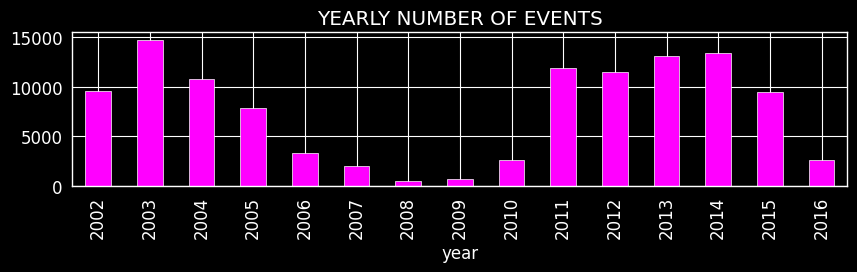

In [70]:
""" Number of events per year """
plt.style.use('dark_background')
new_df.groupby(['year'])['total_counts'].count().plot(kind='bar',figsize=(10,2),title='YEARLY NUMBER OF EVENTS', color='magenta')


# **Mapping solar flares intensity over the years**


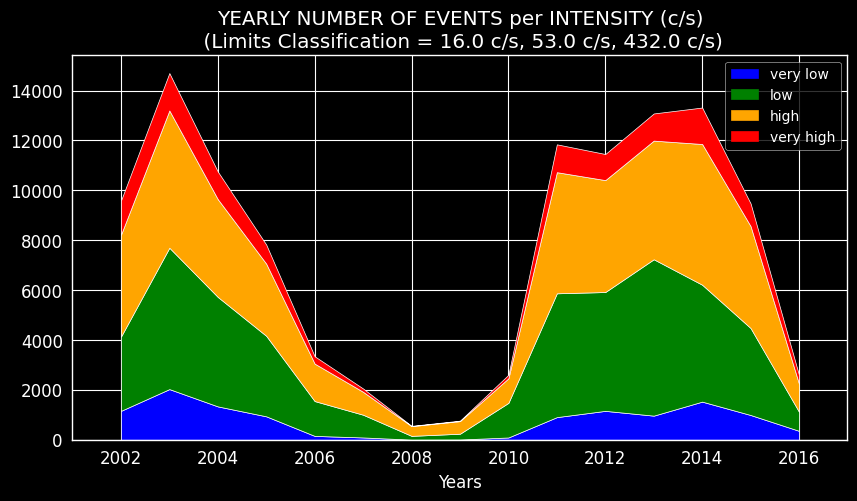

In [71]:
""" Number of events per year and intensity ranges """

# calculate limits of intensity ranges
intensity = new_df['peak_c_s'].values
p10 = np.percentile(intensity,10)
p50 = np.percentile(intensity,50)
p90 = np.percentile(intensity,90)

# plot average of events intensity per year
PI0 = new_df[(new_df['peak_c_s']<=p10)].groupby(['year'])['peak_c_s'].count()
PI1 = new_df[(new_df['peak_c_s']>p10) & (new_df['peak_c_s']<=p50)].groupby(['year'])['peak_c_s'].count()
PI2 = new_df[(new_df['peak_c_s']>p50) & (new_df['peak_c_s']<=p90)].groupby(['year'])['peak_c_s'].count()
PI3 = new_df[(new_df['peak_c_s']>p90)].groupby(['year'])['peak_c_s'].count()
PI = pd.DataFrame({'year':PI0.index.values,'very low':PI0.values,'low':PI1.values,'high':PI2.values,'very high':PI3.values})

import matplotlib.patches as mpatches
# build figure object
fig, ax = plt.subplots(figsize=(10,5))

# collect data
ind = PI0.index.values
y0 = PI0.values
y1 = PI1.values
y2 = PI2.values
y3 = PI3.values
# plot
ax.stackplot(ind, y0, y1, y2, y3, colors=['blue','green','orange','red'])
# set limits
ax.set_xlim([ind[0]-1,ind[-1]+1])
# set legend
ax.legend([mpatches.Patch(color='blue'),
            mpatches.Patch(color='green'),
            mpatches.Patch(color='orange'),
            mpatches.Patch(color='red')],
           ['very low','low','high','very high'])

# set label
ax.set_xlabel('Years')
# set title
ax.set_title('YEARLY NUMBER OF EVENTS per INTENSITY (c/s)\n (Limits Classification = %s c/s, %s c/s, %s c/s)'%(p10,p50,p90))
# plot
plt.show()

## **Number of solar flares per year**

 The solar cycle or solar magnetic activity cycle is the nearly periodic 11-year change in the Sun's activity (including changes in the levels of solar radiation and ejection of solar material) and appearance (changes in the number and size of sunspots, flares, and other manifestations).

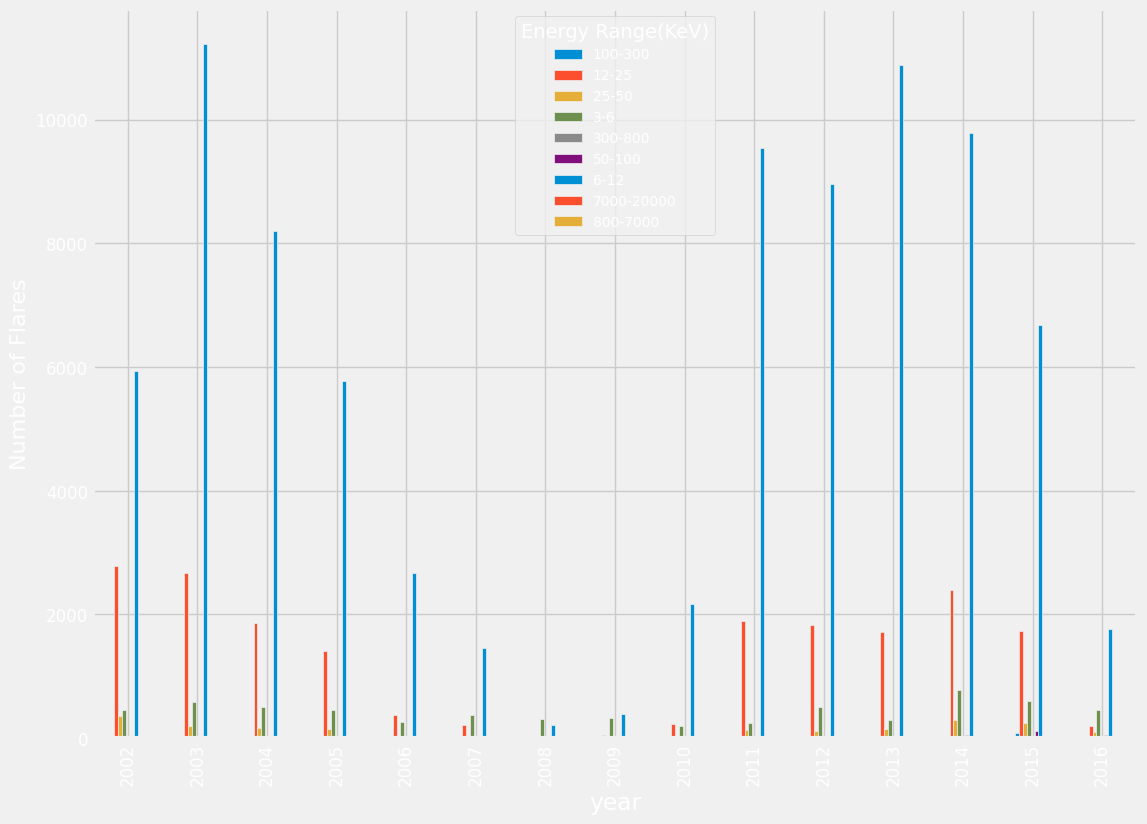

In [72]:
plt.style.use('fivethirtyeight')
new_df.groupby(['year'])['energy_kev'].value_counts().unstack().plot(kind='bar')
plt.ylabel('Number of Flares', fontsize=16)
plt.legend(title='Energy Range(KeV)', loc='best', prop={'size': 10})

## **11 Year cycle confirmed for all energies from the above barplot**


## **Predicting solar flare energy range from the given dataset**

**Data Preprocessing**

In [73]:
predicting_df = df.copy(deep=True)

predicting_df['dt.start'] = predicting_df[['start.date','start.time']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
predicting_df['dt.peak'] = predicting_df[['start.date','peak']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
predicting_df['dt.end'] = predicting_df[['start.date','end']].apply(lambda x: parse_date(x[0],x[1]), axis=1)
# clean columns
predicting_df.drop(['start.date','start.time','peak','end'], axis=1, inplace=True)
# add new columns
predicting_df['year'] = predicting_df['dt.start'].apply(lambda col: col.year)
predicting_df['month'] = predicting_df['dt.start'].apply(lambda col: col.month)
predicting_df['day'] = predicting_df['dt.start'].apply(lambda col: col.day)

In [74]:
# Display columns
predicting_df.columns

Index(['flare', 'duration.s', 'peak.c/s', 'total.counts', 'energy.kev',
       'x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar', 'flag.1',
       'flag.2', 'flag.3', 'flag.4', 'flag.5', 'duration_s_log', 'flare_log',
       'dt.start', 'dt.peak', 'dt.end', 'year', 'month', 'day'],
      dtype='object')

In [75]:
# Rename columns and display few rows
predicting_df = predicting_df.rename(columns = {'duration.s':'duration_s', 'peak.c/s':'peak_c_s', 'total.counts':'total_counts', 'energy.kev':'energy_kev', 'x.pos.asec':'x_pos_asec',
       'y.pos.asec':'y_pos_asec', 'active.region.ar':'active_region_ar', 'flag.1':'flag_1', 'flag.2':'flag_2',
       'flag.3':'flag_3', 'flag.4':'flag_4', 'flag.5':'flag_5', 'dt.start':'date_start', 'dt.peak':'date_peak', 'dt.end':'date_end'})
predicting_df.head(3)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,flag_1,...,flag_4,flag_5,duration_s_log,flare_log,date_start,date_peak,date_end,year,month,day
0,2021213,712,136,167304,12-25,592,-358,692,0,A1,...,NaN,NaN,6.568078,6.568078,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,2002,2,12
1,2021228,288,7,9504,6-12,604,-341,694,9811,A1,...,Q1,NaN,5.662960,5.662960,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,2002,2,12
2,2021332,216,15,11448,6-12,-310,375,487,9825,A1,...,NaN,NaN,5.375278,5.375278,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,2002,2,13


In [76]:
predicting_df = predicting_df.drop(['flag_1', 'flag_2', 'flag_3', 'flag_4', 'flag_5', 'date_start', 'date_peak', 'date_end'], axis=1)

In [77]:
# Checking null values
predicting_df.isnull().any()

flare               False
duration_s          False
peak_c_s            False
total_counts        False
energy_kev          False
x_pos_asec          False
y_pos_asec          False
radial              False
active_region_ar    False
duration_s_log      False
flare_log           False
year                False
month               False
day                 False
dtype: bool

In [78]:
# Viewing dataframe object details
predicting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113942 entries, 0 to 113941
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flare             113942 non-null  int64  
 1   duration_s        113942 non-null  int64  
 2   peak_c_s          113942 non-null  int64  
 3   total_counts      113942 non-null  int64  
 4   energy_kev        113942 non-null  object 
 5   x_pos_asec        113942 non-null  int64  
 6   y_pos_asec        113942 non-null  int64  
 7   radial            113942 non-null  int64  
 8   active_region_ar  113942 non-null  int64  
 9   duration_s_log    113942 non-null  float64
 10  flare_log         113942 non-null  float64
 11  year              113942 non-null  int64  
 12  month             113942 non-null  int64  
 13  day               113942 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 12.2+ MB


In [79]:
# Enumerating energy range values from str to category
dt = predicting_df['energy_kev'].astype('category')
dict(enumerate((dt.cat.categories)))

{0: '100-300',
 1: '12-25',
 2: '25-50',
 3: '3-6',
 4: '300-800',
 5: '50-100',
 6: '6-12',
 7: '7000-20000',
 8: '800-7000'}

In [80]:
# Assigning the enumerated codes to ernegy column
predicting_df['energy_kev'] = dt.cat.codes

In [81]:
# Display dataset - Focus on the energy_kev column, the ranges have been converted to categorial values
predicting_df.head(5)

,flare,duration_s,peak_c_s,total_counts,energy_kev,x_pos_asec,y_pos_asec,radial,active_region_ar,duration_s_log,flare_log,year,month,day
0,2021213,712,136,167304,1,592,-358,692,0,6.568078,6.568078,2002,2,12
1,2021228,288,7,9504,6,604,-341,694,9811,5.662960,5.662960,2002,2,12
2,2021332,216,15,11448,6,-310,375,487,9825,5.375278,5.375278,2002,2,13
3,2021308,244,20,17400,1,-277,378,469,9822,5.497168,5.497168,2002,2,13
4,2021310,236,336,313392,2,-272,390,476,9825,5.463832,5.463832,2002,2,13


# **Creating train and test set for models**

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(predicting_df, test_size=0.2)

X_train.shape, X_test.shape

y_train = X_train['energy_kev']
X_train = X_train.drop(['energy_kev'], axis=1)

y_test = X_test['energy_kev']
X_test = X_test.drop(['energy_kev'], axis=1)



# **Predictions using Various models**

## **Using Linear Regression**

In [83]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_score = linear_regression.score(X_test, y_test)
linear_regression_score_train = linear_regression.score(X_train, y_train)
linear_regression_score, linear_regression_score_train

(0.2057584392867705, 0.192425133296784)

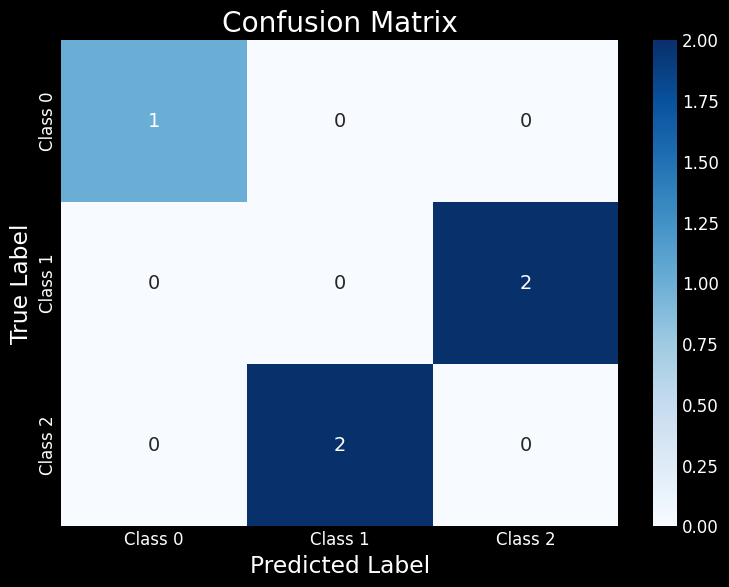

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate some random data for demonstration purposes
y_true = [0, 1, 2, 2, 1]
y_pred = [0, 2, 1, 1, 2]

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [98]:
# Calculate the accuracy score
accuracy = linear_regression.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.2057584392867705


# **Using Logistic regression**

In [100]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression().fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, y_test)
logistic_regression_score_train = logistic_regression.score(X_train, y_train)
logistic_regression_score, logistic_regression_score_train

(0.7746719908727895, 0.7731177251434401)

In [101]:
from sklearn import metrics
print ('\nReport on data set:')
print(metrics.classification_report(y_test, logistic_regression_predictions))
print(metrics.precision_recall_fscore_support(y_test, logistic_regression_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.56      0.26      0.35      3853
           2       0.23      0.01      0.02       416
           3       0.00      0.00      0.00      1268
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        94
           6       0.79      0.97      0.87     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.77     22789
   macro avg       0.18      0.14      0.14     22789
weighted avg       0.69      0.77      0.72     22789

(0.7746719908727895, 0.7746719908727895, 0.7746719908727895, None)


In [104]:
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7746719908727895


## **Using Decision Tree Classifier**

In [105]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_score = decision_tree_classifier.score(X_test, y_test)
decision_tree_score_train = decision_tree_classifier.score(X_train, y_train)
decision_tree_score, decision_tree_score_train

print ('\nReport on data set:')
print(metrics.classification_report(y_test, decision_tree_predictions))
print(metrics.precision_recall_fscore_support(y_test, decision_tree_predictions, average='micro'))




Report on data set:
              precision    recall  f1-score   support

           0       0.13      0.16      0.14        38
           1       0.50      0.53      0.51      3853
           2       0.12      0.12      0.12       416
           3       1.00      1.00      1.00      1268
           4       0.00      0.00      0.00         2
           5       0.14      0.11      0.12        94
           6       0.90      0.89      0.89     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.82     22789
   macro avg       0.31      0.31      0.31     22789
weighted avg       0.82      0.82      0.82     22789

(0.8160516038439598, 0.8160516038439598, 0.8160516038439599, None)


In [108]:
accuracy = decision_tree_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8160516038439598


## **Using Random Forests Classifier**

In [110]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_score = random_forest_classifier.score(X_test, y_test)
random_forest_score_train = random_forest_classifier.score(X_train, y_train)
random_forest_score, random_forest_score_train

(0.8757733994471016, 0.999978058868057)

In [111]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, random_forest_predictions))
print(metrics.precision_recall_fscore_support(y_test, random_forest_predictions, average='micro'))




Report on data set:
              precision    recall  f1-score   support

           0       0.50      0.11      0.17        38
           1       0.69      0.57      0.63      3853
           2       0.46      0.04      0.08       416
           3       1.00      1.00      1.00      1268
           4       0.00      0.00      0.00         2
           5       0.71      0.05      0.10        94
           6       0.90      0.96      0.93     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.88     22789
   macro avg       0.47      0.30      0.32     22789
weighted avg       0.86      0.88      0.86     22789

(0.8757733994471016, 0.8757733994471016, 0.8757733994471016, None)


In [112]:
accuracy = random_forest_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8757733994471016


## **Using K Nearest Neighbours**

In [113]:
from sklearn.neighbors import KNeighborsClassifier
kneighbors_classifier = KNeighborsClassifier().fit(X_train, y_train)
kneighbors_predictions = kneighbors_classifier.predict(X_test)
kneighbors_score = kneighbors_classifier.score(X_test, y_test)
kneighbors_score_train = kneighbors_classifier.score(X_train, y_train)
kneighbors_score, kneighbors_score_train

(0.7662468734915968, 0.824416091626167)

In [114]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, kneighbors_predictions))
print(metrics.precision_recall_fscore_support(y_test, kneighbors_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.20      0.11      0.14        38
           1       0.46      0.43      0.45      3853
           2       0.12      0.03      0.05       416
           3       0.49      0.27      0.35      1268
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        94
           6       0.84      0.90      0.87     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.77     22789
   macro avg       0.24      0.19      0.21     22789
weighted avg       0.74      0.77      0.75     22789

(0.7662468734915968, 0.7662468734915968, 0.7662468734915968, None)


In [115]:
accuracy = kneighbors_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7662468734915968


## **Using Gradient Boosting Classifier**

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_classifier = GradientBoostingClassifier().fit(X_train, y_train)
gradient_classifier_predictions = gradient_classifier.predict(X_test)
gradient_classifier_score = gradient_classifier.score(X_test, y_test)
gradient_classifier_score_train = gradient_classifier.score(X_train, y_train)
gradient_classifier_score, gradient_classifier_score_train

(0.8712097941989556, 0.8734435509527937)

In [117]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, gradient_classifier_predictions))
print(metrics.precision_recall_fscore_support(y_test, gradient_classifier_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.33      0.18      0.24        38
           1       0.68      0.54      0.60      3853
           2       0.57      0.04      0.08       416
           3       1.00      1.00      1.00      1268
           4       0.00      0.00      0.00         2
           5       0.30      0.03      0.06        94
           6       0.89      0.96      0.93     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.87     22789
   macro avg       0.42      0.31      0.32     22789
weighted avg       0.86      0.87      0.86     22789

(0.8712097941989556, 0.8712097941989556, 0.8712097941989556, None)


In [118]:
accuracy = gradient_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8712097941989556


## **Using Neural Network (scikit-learn)**

In [119]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,10)).fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
mlp_score = mlp_classifier.score(X_test, y_test)
mlp_score_train = mlp_classifier.score(X_train, y_train)
mlp_score, mlp_score_train

(0.7510202290578788, 0.7523614143253651)

In [120]:
print ('\nReport on data set:')
print(metrics.classification_report(y_test, mlp_predictions))
print(metrics.precision_recall_fscore_support(y_test, mlp_predictions, average='micro'))


Report on data set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00      3853
           2       0.00      0.00      0.00       416
           3       0.00      0.00      0.00      1268
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        94
           6       0.75      1.00      0.86     17115
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2

    accuracy                           0.75     22789
   macro avg       0.08      0.11      0.10     22789
weighted avg       0.56      0.75      0.64     22789

(0.7510202290578788, 0.7510202290578788, 0.7510202290578787, None)


In [121]:
accuracy = mlp_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7510202290578788


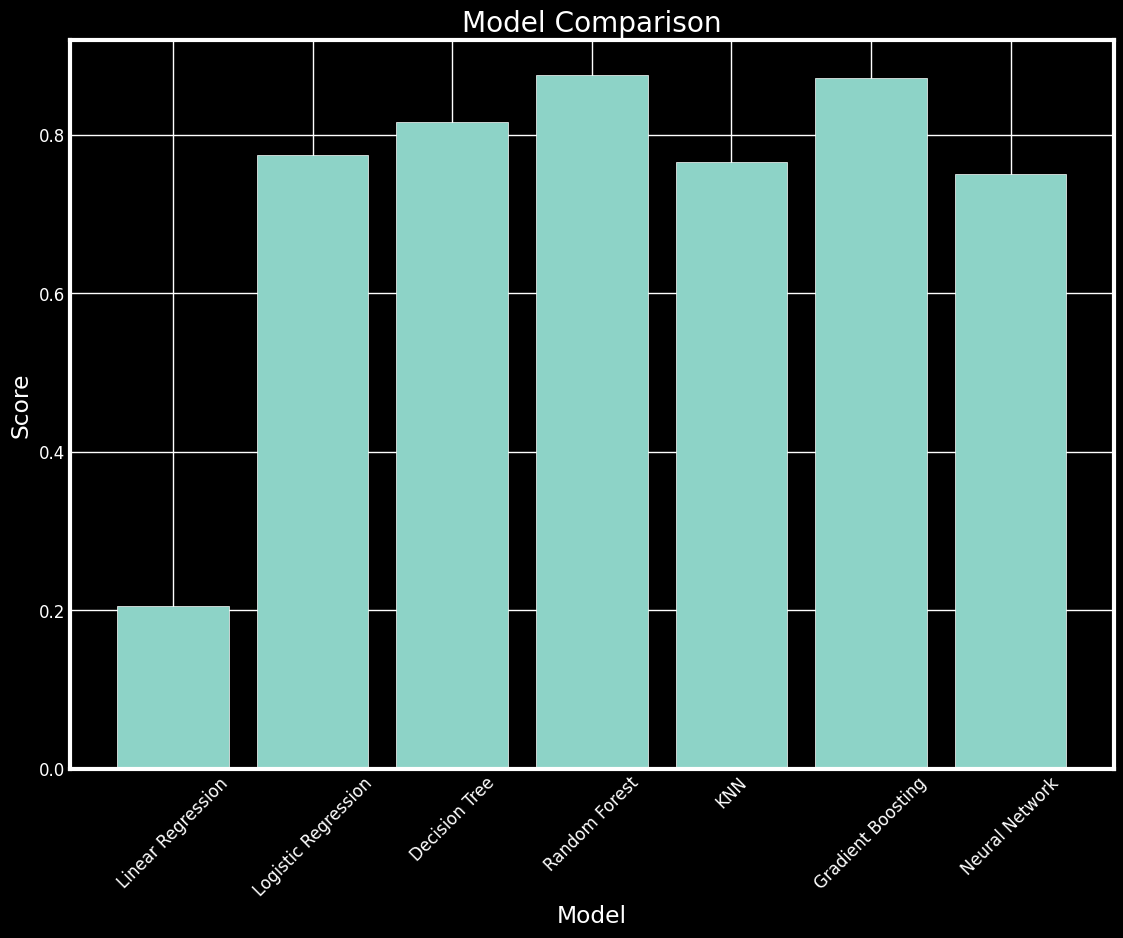

In [128]:

import matplotlib.pyplot as plt

# Create a list of model names and their corresponding scores
model_names = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gradient Boosting', 'Neural Network']
model_scores = [linear_regression_score, logistic_regression_score, decision_tree_score, random_forest_score, kneighbors_score, gradient_classifier_score, mlp_score]

# Create a bar chart
plt.bar(model_names, model_scores)

# Add title and labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
